In [486]:
!python3 --version

Python 3.10.12


In [487]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [488]:
train_data = pd.read_csv('/kaggle/input/melody-metricspopularity/test.csv')
test_data = pd.read_csv('/kaggle/input/melody-metricspopularity/train.csv')

In [489]:
test_data.shape

(8000, 7)

In [490]:
test_data.describe()

,SongLength,NumInstruments,Tempo,LyricalContent,ReleasedYear,Popularity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,273.589503,4.940125,129.077731,0.499154,2001.003625,49.334637
std,71.708680,2.585754,39.988642,0.289179,12.356535,21.296583
min,150.002909,1.000000,60.013660,0.000017,1980.000000,0.000000
25%,212.088516,3.000000,94.237178,0.250352,1990.000000,33.075306
50%,273.014753,5.000000,129.673045,0.495696,2001.000000,49.286768
75%,335.088452,7.000000,162.812788,0.751058,2012.000000,65.515098
max,399.929418,9.000000,199.970512,0.999972,2022.000000,100.000000


In [491]:
test_data.head(20)

,SongLength,NumInstruments,Genre,Tempo,LyricalContent,ReleasedYear,Popularity
0,234.369261,4,Classical,84.774424,0.152603,2009,13.636534
1,343.876324,6,Jazz,65.486515,0.408796,1980,42.910689
2,305.973959,1,Jazz,164.752829,0.318433,1981,48.790880
3,158.897558,4,Pop,186.565004,0.680595,1984,68.362001
4,294.279271,4,Country,140.615871,0.969931,2015,86.969489
5,211.865745,3,Rap,174.926816,0.563496,2021,51.804136
6,186.768370,2,Jazz,99.281856,0.266840,2003,16.765361
7,310.694353,6,Jazz,129.716442,0.044765,1988,27.323923
8,267.451080,6,Jazz,191.067332,0.878952,2020,80.225059
9,170.337195,3,Classical,118.744283,0.015339,1986,8.984217


In [492]:
train_data.shape

(2000, 6)

In [493]:
train_data.describe()

,SongLength,NumInstruments,Tempo,LyricalContent,ReleasedYear
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,273.341433,5.051000,130.637948,0.495397,2001.471000
std,72.715244,2.575794,40.899189,0.291668,12.219526
min,150.033673,1.000000,60.000775,0.000613,1980.000000
25%,209.354794,3.000000,94.832392,0.243012,1991.000000
50%,273.754843,5.000000,129.582562,0.492893,2002.000000
75%,334.915478,7.000000,167.133491,0.755646,2012.000000
max,399.837575,9.000000,199.879191,0.999891,2022.000000


In [494]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SongLength      2000 non-null   float64
 1   NumInstruments  2000 non-null   int64  
 2   Genre           2000 non-null   object 
 3   Tempo           2000 non-null   float64
 4   LyricalContent  2000 non-null   float64
 5   ReleasedYear    2000 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 93.9+ KB


#### checking if there are any missing values

In [495]:
train_data.isnull().any().any(), test_data.isnull().any().any()

(False, False)

#### relationships between features and popularity

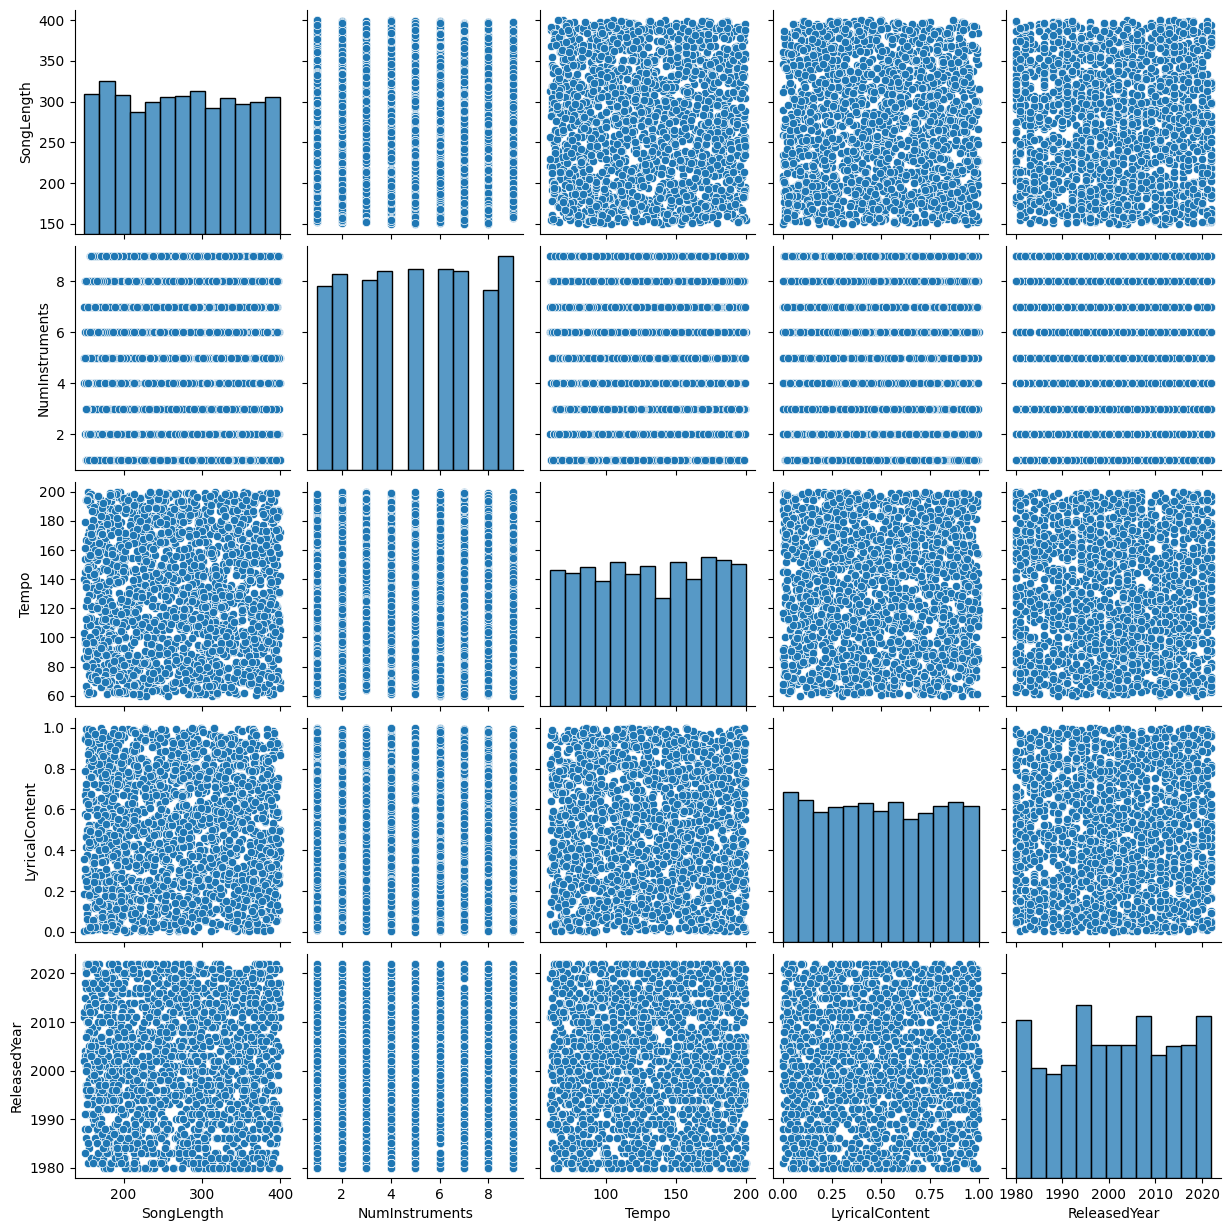

In [496]:
sns.pairplot(train_data[
     train_data.columns.tolist()
])

#### converting categorical variables into a suitable format


In [497]:
train_data_encoded = pd.get_dummies(train_data, columns=['Genre'])
test_data_encoded = pd.get_dummies(test_data, columns=['Genre'])

#### relevant features / target variable

In [498]:
x = test_data_encoded[['SongLength', 'NumInstruments', 'Tempo', 'LyricalContent', 'ReleasedYear']]
y = test_data_encoded['Popularity']

#### data splitting into training and validation sets

In [499]:
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=42)

#### standardize/scale the features

In [500]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_validation_scaled = scaler.transform(x_validation)

#### a linear regression model comes in handy

In [501]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

#### predictions over the validation set

In [502]:
y_pred = model.predict(x_validation_scaled)

#### model evaluation

In [503]:
mse = mean_squared_error(y_validation, y_pred)
r_squared = r2_score(y_validation, y_pred)
f'mean squarred err: {mse}', f'r-squared: {r_squared}'

('mean squarred err: 24.66238562885793', 'r-squared: 0.944375450455165')

#### practical significance check

In [504]:
practical_significance_threshold = 0.1
if r_squared > practical_significance_threshold:
    print("The model has practical significance.")

The model has practical significance.


In [505]:
coefficients = model.coef_
feature_names = x_train.columns

#### `Tempo` coeff

In [506]:
tempo_coefficient = coefficients[feature_names.get_loc('Tempo')]
tempo_coefficient

9.7814943163824

#### overall assessment

In [507]:
if tempo_coefficient:
    print("As the song tempo increases, the predicted popularity also rises.")
else:
    print("As the song tempo increases, the predicted popularity decreases.")

As the song tempo increases, the predicted popularity also rises.
